In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
Diabetes_data = pd.read_csv('/content/cleanedlaeew_insurance.csv')
Diabetes_data

,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,89,66,94,28.1,0.167,21,0
1,137,40,168,43.1,2.288,33,1
2,78,50,88,31.0,0.248,26,1
3,197,70,543,30.5,0.158,53,1
4,189,60,846,30.1,0.398,59,1
...,...,...,...,...,...,...,...
387,181,88,510,43.3,0.222,26,1
388,128,88,110,36.5,1.057,37,1
389,88,58,16,28.4,0.766,22,0
390,101,76,180,32.9,0.171,63,0


In [ ]:
Diabetes_data.describe(include='all')

,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,122.627551,70.663265,156.056122,33.086224,0.523046,30.864796,0.331633
std,30.860781,12.496092,118.841690,7.027659,0.345488,10.200777,0.471401
min,56.000000,24.000000,14.000000,18.200000,0.085000,21.000000,0.000000
25%,99.000000,62.000000,76.750000,28.400000,0.269750,23.000000,0.000000
50%,119.000000,70.000000,125.500000,33.200000,0.449500,27.000000,0.000000
75%,143.000000,78.000000,190.000000,37.100000,0.687000,36.000000,1.000000
max,198.000000,110.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Modeling

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(Diabetes_data.iloc[:,:-1], 
                                                    Diabetes_data.iloc[:,-1:], 
                                                    test_size=0.3, random_state=12)

In [ ]:
print(x_train.shape)
print(x_test.shape)

(274, 6)
(118, 6)


In [ ]:
print(x_train)

     Glucose  BloodPressure  Insulin   BMI  DiabetesPedigreeFunction  Age
44       122             90      220  49.7                     0.325   31
334      117             60      106  33.8                     0.466   27
224      117             64      120  33.2                     0.230   24
355      121             70       95  39.1                     0.886   23
11       125             70      115  31.1                     0.205   41
..       ...            ...      ...   ...                       ...  ...
130      104             64      116  27.8                     0.454   23
241      154             78      140  46.1                     0.571   27
253       81             72       76  30.1                     0.547   25
155      155             74       96  26.6                     0.433   27
331      179             50      159  37.8                     0.455   22

[274 rows x 6 columns]


In [ ]:
print(y_train)

     Outcome
44         1
334        0
224        0
355        0
11         1
..       ...
130        0
241        0
253        0
155        1
331        1

[274 rows x 1 columns]


In [ ]:
np.unique(y_train, return_counts=True)

(array([0, 1]), array([180,  94]))

In [ ]:
from sklearn import tree
decision_tree = tree.DecisionTreeClassifier() #จำกัดความลึกของต้นไม้

In [ ]:
decision_tree = decision_tree.fit(x_train, y_train)

In [ ]:
decision_tree.classes_

array([0, 1])

In [ ]:
decision_tree.feature_importances_

array([0.29328231, 0.03450833, 0.20210611, 0.15944392, 0.10446688,
       0.20619246])

In [ ]:
decision_tree.get_depth()

13

In [ ]:
dict(zip(Diabetes_data, decision_tree.feature_importances_))

{'Age': 0.2061924562629624,
 'BMI': 0.1594439185089189,
 'BloodPressure': 0.034508330518968816,
 'DiabetesPedigreeFunction': 0.10446687825997546,
 'Glucose': 0.293282308298542,
 'Insulin': 0.20210610815063237}

In [ ]:
decision_tree.n_features_

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: The attribute `n_features_` is deprecated in 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


6

In [ ]:
y_pred = decision_tree.predict(x_test)
y_pred

array([1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0])

In [ ]:
Diabetes_data.columns

Index(['Glucose', 'BloodPressure', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

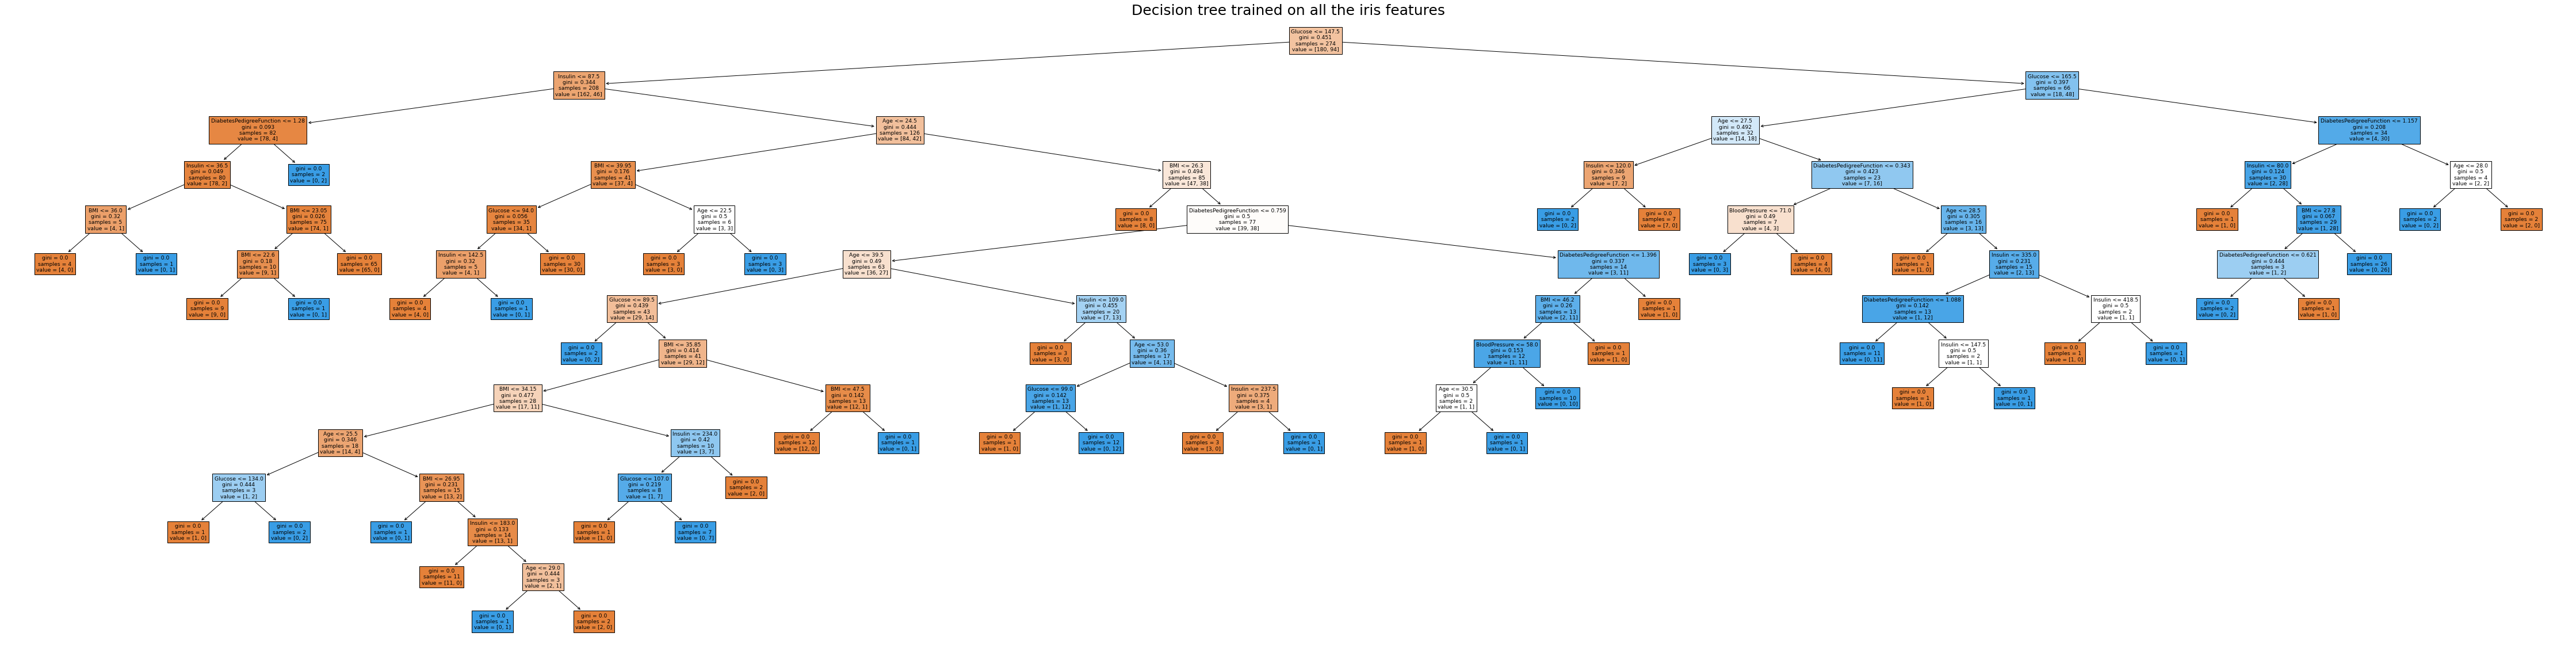

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(80,20))
plot_tree(decision_tree, filled=True, feature_names=Diabetes_data.columns)
plt.title("Decision tree trained on all the iris features", fontsize=25)
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.8050847457627118


In [ ]:
from sklearn.metrics import classification_report

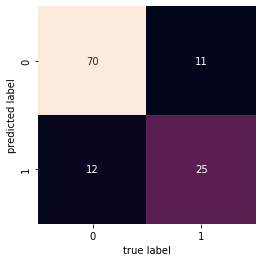

In [ ]:
plot_confusion(y_pred)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.85      0.86        82
           1       0.68      0.69      0.68        36

    accuracy                           0.81       118
   macro avg       0.77      0.77      0.77       118
weighted avg       0.81      0.81      0.81       118

